# Proyecto 1

## Continuación de Proyecto

Cristina Bautista - 161260

Abril Palencia - 18198 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
# from pandas_profiling import ProfileReport
import re


%matplotlib inline

In [2]:
df = pd.read_csv('dataset/final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 32 columns):
 #   Column                      Dtype
---  ------                      -----
 0   Unnamed: 0                  int64
 1   BIFLOW_DIRECTION            int64
 2   DIRECTION                   int64
 3   FIRST_SWITCHED              int64
 4   FLOW_DURATION_MILLISECONDS  int64
 5   FLOW_END_MILLISECONDS       int64
 6   FLOW_ID                     int64
 7   FLOW_START_MILLISECONDS     int64
 8   IN_BYTES                    int64
 9   IN_PKTS                     int64
 10  L4_DST_PORT                 int64
 11  L4_SRC_PORT                 int64
 12  LAST_SWITCHED               int64
 13  OOORDER_IN_PKTS             int64
 14  OOORDER_OUT_PKTS            int64
 15  OUT_BYTES                   int64
 16  OUT_PKTS                    int64
 17  PROTOCOL                    int64
 18  TCP_FLAGS                   int64
 19  TCP_WIN_MAX_IN              int64
 20  TCP_WIN_MAX_OUT        

In [4]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE 
from collections import Counter

In [5]:
sorted(Counter(df['LABEL']).items())

[(0, 8574490), (1, 575486), (2, 218460), (3, 631564)]

0    8574490
3     631564
1     575486
2     218460
Name: LABEL, dtype: int64

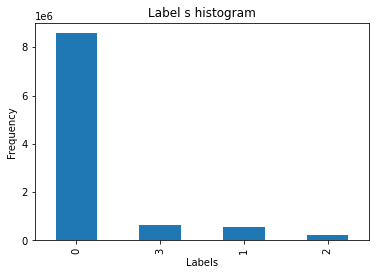

In [6]:
pd.value_counts(df['LABEL']).plot.bar()
plt.title('Label s histogram')
plt.xlabel('Labels')
plt.ylabel('Frequency')
df['LABEL'].value_counts()

In [7]:
X = df
y = df[['LABEL']]
X.drop(['LABEL'], axis=1)

,Unnamed: 0,BIFLOW_DIRECTION,DIRECTION,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_ID,FLOW_START_MILLISECONDS,IN_BYTES,IN_PKTS,...,TCP_WIN_MIN_IN,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP
0,486885,1,0,1622437206,0,1622437206455,7549130,1622437206455,40,1,...,1024,0,0,0,0,0,0,0,1,7549130
1,9617043,1,0,1622440145,0,1622440145780,16679288,1622440145780,40,1,...,1024,0,0,0,0,0,0,0,1,16679288
2,601904,1,0,1622437231,0,1622437231644,7664149,1622437231643,40,1,...,1024,0,0,0,0,0,0,0,1,7664149
3,7965335,1,0,1622438512,27,1622438512243,15027580,1622438512215,73,1,...,0,0,0,0,0,0,0,0,1,15027580
4,26062581,1,0,1622451497,14,1622451497063,33124826,1622451497049,41,1,...,517,8,0,0,0,0,0,0,1,33124826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,1613281,1,0,1622437411,0,1622437411727,8675526,1622437411727,40,1,...,1024,0,0,0,0,0,0,0,1,8675526
9999996,5293854,1,0,1622438049,0,1622438049282,12356099,1622438049282,40,1,...,1024,0,0,0,0,0,0,0,1,12356099
9999997,806399,1,0,1622191758,29,1622191758504,2172506,1622191758475,151,3,...,114,1024,0,0,0,0,0,0,1,2172506
9999998,22148424,1,0,1622443646,0,1622443646993,29210669,1622443646993,40,1,...,1024,0,0,0,0,0,0,0,1,29210669


In [8]:
y.value_counts()

LABEL
0        8574490
3         631564
1         575486
2         218460
dtype: int64

In [9]:
X.shape, y.shape

((10000000, 32), (10000000, 1))

In [11]:
ros = RandomOverSampler(random_state=5)
X_resample, y_resample = ros.fit_resample(X, y)

In [12]:
X_resample.shape, y_resample.shape

((34297960, 32), (34297960, 1))

In [27]:
X_resample.drop(['LABEL'], axis=1)

,Unnamed: 0,BIFLOW_DIRECTION,DIRECTION,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_ID,FLOW_START_MILLISECONDS,IN_BYTES,IN_PKTS,...,TCP_WIN_MIN_IN,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP
0,486885,1,0,1622437206,0,1622437206455,7549130,1622437206455,40,1,...,1024,0,0,0,0,0,0,0,1,7549130
1,9617043,1,0,1622440145,0,1622440145780,16679288,1622440145780,40,1,...,1024,0,0,0,0,0,0,0,1,16679288
2,601904,1,0,1622437231,0,1622437231644,7664149,1622437231643,40,1,...,1024,0,0,0,0,0,0,0,1,7664149
3,7965335,1,0,1622438512,27,1622438512243,15027580,1622438512215,73,1,...,0,0,0,0,0,0,0,0,1,15027580
4,26062581,1,0,1622451497,14,1622451497063,33124826,1622451497049,41,1,...,517,8,0,0,0,0,0,0,1,33124826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34297955,2290662,1,0,1616670232,0,1616670232320,4584230,1616670232319,44,1,...,1024,0,1460,0,0,0,0,0,1,4584230
34297956,1317953,1,0,1616666106,0,1616666106221,3611521,1616666106221,44,1,...,1024,0,1460,0,0,0,0,0,1,3611521
34297957,1077376,1,0,1616664591,0,1616664591994,3370944,1616664591993,44,1,...,1024,0,1460,0,0,0,0,0,1,3370944
34297958,1367892,1,0,1616666317,0,1616666317804,3661460,1616666317803,44,1,...,1024,0,1460,0,0,0,0,0,1,3661460


In [28]:
X_resample

,Unnamed: 0,BIFLOW_DIRECTION,DIRECTION,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_ID,FLOW_START_MILLISECONDS,IN_BYTES,IN_PKTS,...,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,486885,1,0,1622437206,0,1622437206455,7549130,1622437206455,40,1,...,0,0,0,0,0,0,0,1,7549130,0
1,9617043,1,0,1622440145,0,1622440145780,16679288,1622440145780,40,1,...,0,0,0,0,0,0,0,1,16679288,0
2,601904,1,0,1622437231,0,1622437231644,7664149,1622437231643,40,1,...,0,0,0,0,0,0,0,1,7664149,0
3,7965335,1,0,1622438512,27,1622438512243,15027580,1622438512215,73,1,...,0,0,0,0,0,0,0,1,15027580,0
4,26062581,1,0,1622451497,14,1622451497063,33124826,1622451497049,41,1,...,8,0,0,0,0,0,0,1,33124826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34297955,2290662,1,0,1616670232,0,1616670232320,4584230,1616670232319,44,1,...,0,1460,0,0,0,0,0,1,4584230,3
34297956,1317953,1,0,1616666106,0,1616666106221,3611521,1616666106221,44,1,...,0,1460,0,0,0,0,0,1,3611521,3
34297957,1077376,1,0,1616664591,0,1616664591994,3370944,1616664591993,44,1,...,0,1460,0,0,0,0,0,1,3370944,3
34297958,1367892,1,0,1616666317,0,1616666317804,3661460,1616666317803,44,1,...,0,1460,0,0,0,0,0,1,3661460,3


In [13]:
y_resample.value_counts()

LABEL
0        8574490
1        8574490
2        8574490
3        8574490
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# X_train_tree, y_train_tree, X_valid_tree, y_valid_tree, X_test_tree, y_test_tree = train_valid_test_split(X_resample, y_resample, 
#                                                                             train_size=0.55, valid_size=0.15, test_size=0.30)

In [38]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X_resample, y_resample, train_size = 0.55, 
                                                             test_size=0.45, random_state = 0)

In [39]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size = 0.67, 
                                                             test_size=0.33, random_state = 0)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dTree = DecisionTreeClassifier()

In [42]:
dTree = dTree.fit(X_train, y_train)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
target_prediction = dTree.predict(X_val)

In [45]:
accuracy_score(y_val, target_prediction)

1.0

In [46]:
confusion_matrix(y_val, target_prediction)

array([[2585262,       0,       0,       0],
       [      0, 2584313,       0,       0],
       [      0,       0, 2585483,       0],
       [      0,       0,       0, 2585776]])

In [47]:
print(classification_report(y_val, target_prediction, target_names=[0, 1, 2, 3]))

TypeError: object of type 'int' has no len()

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
dTree = DecisionTreeClassifier()